# Advance Visualisation and EDA 

In [1]:
#! conda install basemap
#! conda install basemap-data-hires
#! pip3 install Pillow

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
# files comming from previous step.
df_event = pd.read_csv('event_data.csv')
df_non_event = pd.read_csv('non_event_data.csv')

In [4]:
df_non_event.head(2)

,device_id,gender,age,group,phone_brand,device_model,group_cat,avg_events,most_active_hour
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,33-45,58.4,15.0
1,6943568600617760000,M,37,M32+,Xiaomi,xnote,33-45,1.0,11.0


In [5]:
data_points_to_select = 100000
any_x_events = df_event[(df_event.longitude > 0) & (df_event.latitude > 0)].sample(n = data_points_to_select)

### 1. Plot the visualisation plot for a sample of 1 lakh data points.

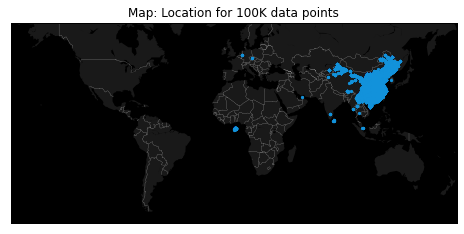

In [6]:
fig = plt.figure(figsize=(8, 8))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(any_x_events["longitude"].tolist(), any_x_events["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("Map: Location for 100K data points")
plt.show()

### 2.Compare the event visualisation plots based on the users' gender information. [This can be done on the sample of 1 lakh data points.]

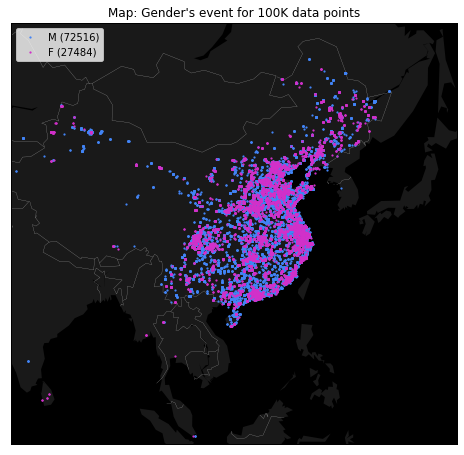

In [7]:
fig = plt.figure(figsize=(8, 8))
classes=['M','F']
classes_color = ['#4284f5','#d130c9'] 

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=0,
             urcrnrlat=55,
             llcrnrlon=75,
             urcrnrlon=145,
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
for i,grp in enumerate(classes):
    filtered_data = any_x_events[any_x_events.gender.str.strip() == grp.strip()]
    x,y = m(filtered_data["longitude"].tolist(), filtered_data["latitude"].tolist())
    m.scatter(x, y, s=5, c=classes_color[i], label=str(grp+' ('+str(filtered_data.gender.count())+')') ,lw=0, alpha=1, zorder=5)    # zorder for the points  

plt.title("Map: Gender's event for 100K data points")
plt.legend()
plt.show()

Observation:

### 3.Compare the event visualisation plots based on the following age groups: [0–24 , 25–32, 32+]

C:\Users\akshay.a\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


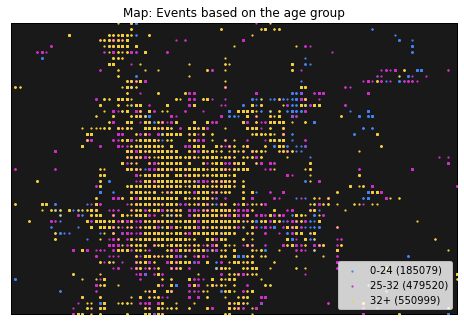

In [8]:
fig = plt.figure(figsize=(8, 8))
classes=['M','F']
classes_color = ['#4284f5','#d130c9','#F4D03F'] 

lon_min, lon_max = 116, 117
lat_min, lat_max = 39.75, 40.25

# Mercator of World
m = Basemap(projection='merc',
           llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
#plot group 0-24
filtered_data = df_event[df_event.group_cat.str.strip() == '0-24']
x,y = m(filtered_data["longitude"].tolist(), filtered_data["latitude"].tolist())
m.scatter(x, y, s=5, c=classes_color[0], label=str('0-24 ('+str(filtered_data.gender.count())+')') ,lw=0, alpha=1, zorder=5)    # zorder for the points  

#plot group 25-32
filtered_data = df_event[df_event.group_cat.str.strip() == '25-32']
x,y = m(filtered_data["longitude"].tolist(), filtered_data["latitude"].tolist())
m.scatter(x, y, s=5, c=classes_color[1], label=str('25-32 ('+str(filtered_data.gender.count())+')') ,lw=0, alpha=1, zorder=5)    # zorder for the points  

#plot group 33+
filtered_data = df_event[(df_event.group_cat.str.strip() != '0-24') & (df_event.group_cat.str.strip() != '25-32')]
x,y = m(filtered_data["longitude"].tolist(), filtered_data["latitude"].tolist())
m.scatter(x, y, s=5, c=classes_color[2], label=str('32+ ('+str(filtered_data.gender.count())+')') ,lw=0, alpha=1, zorder=5)    # zorder for the points  


plt.title("Map: Events based on the age group")
plt.legend()
plt.show()

Observation: 

## Featuring engineering based on location

### changes in the latitude and longitude details at different times of the day

In [9]:
def hour_day_cat(hour):
    if( hour>=6 and hour<=12):
        return 'Morning'
    elif( hour>=12 and hour<=18):
        return 'Afternoon'
    elif( hour>=18 and hour<=24):
        return 'Evening'
    else:
        return 'Night'
    
df_event['hour_day_cat'] = df_event.hour_day.apply(hour_day_cat)
df_event.head(5)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,has_event,week_day,hour_day,week,year,group_cat,hour_day_cat
0,-7548291590301750000,M,33,M32+,414.0,2016-05-03 00:05:31,116.79,33.98,1,Tuesday,0,18,2016,33-45,Night
1,-7548291590301750000,M,33,M32+,2604805.0,2016-05-04 03:01:32,116.79,33.98,1,Wednesday,3,18,2016,33-45,Night
2,-7548291590301750000,M,33,M32+,2588911.0,2016-05-03 16:14:14,116.79,33.98,1,Tuesday,16,18,2016,33-45,Afternoon
3,-7548291590301750000,M,33,M32+,2586055.0,2016-05-02 14:36:04,116.79,33.98,1,Monday,14,18,2016,33-45,Afternoon
4,-7548291590301750000,M,33,M32+,2560938.0,2016-05-02 18:01:00,116.79,33.98,1,Monday,18,18,2016,33-45,Afternoon


In [10]:
positon_changeed_df = df_event.groupby(['device_id','hour_day_cat'])[['longitude']].agg(np.median)
positon_changeed_df = positon_changeed_df['longitude'].reset_index()
positon_changeed_df = positon_changeed_df.pivot(columns='hour_day_cat', index='device_id')
#positon_changeed_df

In [11]:
new_header =positon_changeed_df.columns.map(lambda x:x[1]) #grab the first row for the header
positon_changeed_df = positon_changeed_df[:] #take the data less the header row
positon_changeed_df.columns = new_header #set the header row as the df header

In [12]:
positon_changeed_df['loc_chng_morning'] =  positon_changeed_df.Morning == positon_changeed_df.Afternoon
positon_changeed_df['loc_chng_afternoon'] = positon_changeed_df.Afternoon == positon_changeed_df.Evening
positon_changeed_df['loc_chng_evening'] =  positon_changeed_df.Evening == positon_changeed_df.Night
positon_changeed_df['loc_chng_night'] =  positon_changeed_df.Night == positon_changeed_df.Morning
positon_changeed_df.drop(['Afternoon','Evening','Morning','Night'], axis=1, inplace =True)
positon_changeed_df.head(2)


,loc_chng_morning,loc_chng_afternoon,loc_chng_evening,loc_chng_night
device_id,,,,
-9222956879900150000,True,True,False,False
-9221026417907250000,False,False,False,False


In [13]:
# merge the data with non_event_dataset
df_non_event=df_non_event.merge(positon_changeed_df, how='left', on='device_id')
df_non_event.head(1)

,device_id,gender,age,group,phone_brand,device_model,group_cat,avg_events,most_active_hour,loc_chng_morning,loc_chng_afternoon,loc_chng_evening,loc_chng_night
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,33-45,58.4,15.0,True,True,True,True


In [14]:
df_event.to_csv('../3_Clustering/event_data.csv',index=False)
df_non_event.to_csv('../3_Clustering/non_event_data.csv',index=False)

----

End of this notebook